In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_data.load_data()

In [3]:
# Look at the shapes
X_train.shape, y_train.shape, np.unique(y_train)

((60000, 28, 28), (60000,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [4]:
# Set the label names
labels = ['T-shirt', 'Trousers', 'Pullover', 'Dress',
          'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# See whats at the 19th position
labels[y_train[19]]

'Coat'

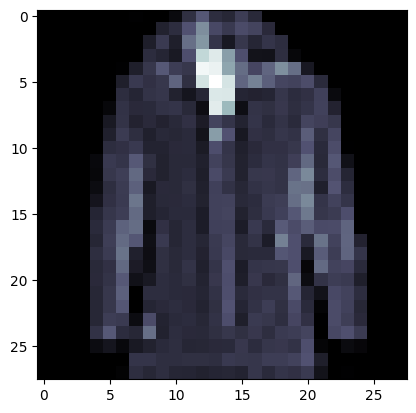

In [6]:
# See 19th item
plt.figure()
plt.imshow(X_train[19], cmap=plt.cm.bone)

In [7]:
# Scale the images (as they are 8 bit)
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.7209 - loss: 0.7829
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8379 - loss: 0.4420
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8563 - loss: 0.3991
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.8621 - loss: 0.3761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.8700 - loss: 0.3592
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3452
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8780 - loss: 0.3339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8787 - loss: 0.3305
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8824 - loss: 0.3206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8822 - loss: 0.3187


In [11]:
y_pred = model(X_test)
class_label = [labels[np.argmax(y_pred[i])] for i, _ in enumerate(y_test)]

Text(0.5, 1.0, 'Pullover')

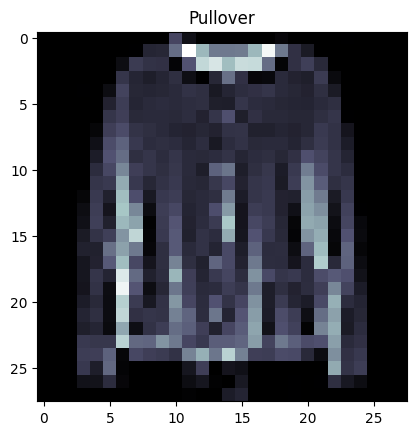

In [12]:
# See nth item
n=25
plt.figure()
plt.imshow(X_test[n], cmap=plt.cm.bone)
plt.title(class_label[n])

In [13]:
incorrect_predictions = [i for i, label in enumerate(class_label) if label != labels[y_test[i]]]
len(incorrect_predictions)

1242

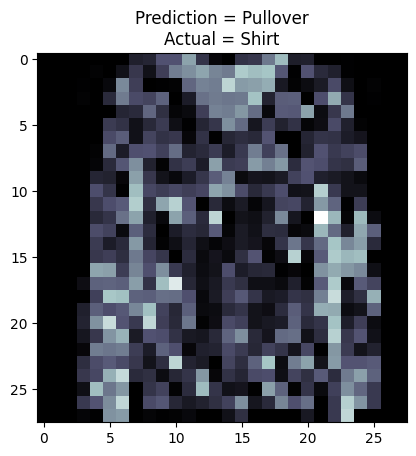

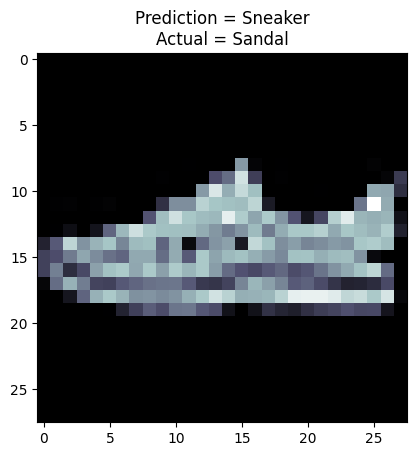

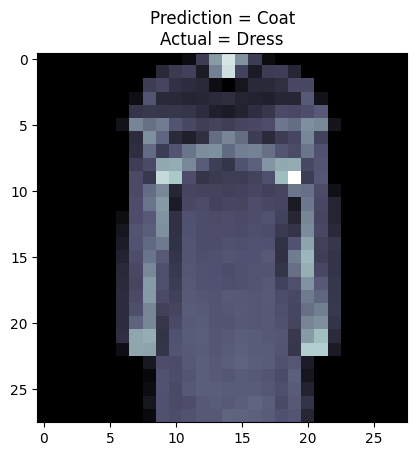

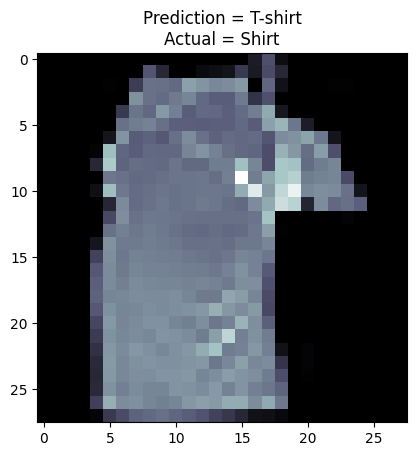

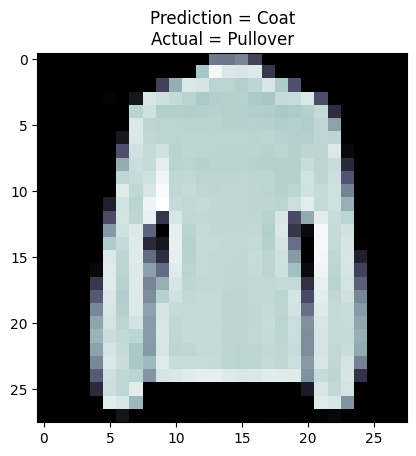

In [14]:
from random import sample

sample_incorrect = sample(incorrect_predictions, 5)

for sample in sample_incorrect:
    plt.figure()
    plt.imshow(X_test[sample], cmap=plt.cm.bone)
    plt.title(f'Prediction = {class_label[sample]}\nActual = {labels[y_test[sample]]}')